# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_gira_agg_2h_wtimevars_scaling_input.csv'


file_tag = "Gira Bike"


# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


In [4]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(filepath, decimal=",", index_col='date', parse_dates=True, infer_datetime_format=True)

# Verificar os tipos de dados antes da conversão
display(data.dtypes)

# Forçar a conversão para o tipo numérico para todas as colunas que devem ser numéricas
# Selecionando todas as colunas, exceto o índice (que é de data)
numeric_columns = data.columns.difference(['date'])

# Tentar converter as colunas numéricas
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

test_split_threshold=0.9
target = 'target_station_load_rate' 

# Verifique o tipo das colunas após a conversão
print("\nTipos de dados após a conversão:")
display(data.dtypes)

# Exibir as últimas linhas para confirmar que os dados estão corretos
display(data.tail())

display(data.index.min())
display(data.index.max())
display(data.shape)


temperature_2m                                                 object
rain_mm                                                        object
wmo_weather_code                                               object
wind_speed_10m                                                 object
is_holiday_lisbon                                              object
is_weekend                                                     object
day_of_week_sin                                                object
day_of_week_cos                                                object
time_of_day_sin                                                object
time_of_day_cos                                                object
target_station_status                                          object
target_station_load_rate                                       object
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       object
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       object
station_load_rate_ P


Tipos de dados após a conversão:


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                               float64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
is_weekend                                                     float64
day_of_week_sin                                                float64
day_of_week_cos                                                float64
time_of_day_sin                                                float64
time_of_day_cos                                                float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
statio

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,is_weekend,day_of_week_sin,day_of_week_cos,time_of_day_sin,time_of_day_cos,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,,,,,,
2023-03-31 14:00:00,0.629548,-0.185984,-0.266712,0.372947,-0.185323,-0.627069,-1.221826,-0.76628,-1.269072,-0.323037,-18.098242,0.046047,1.197282,-0.286165,-0.500981,0.685285,-0.584853
2023-03-31 16:00:00,0.419629,-0.185984,-0.266712,0.228509,-0.185323,-0.627069,-1.221826,-0.76628,-1.269072,-0.323037,0.056934,0.098741,0.524269,-0.363202,-0.461967,0.435683,-0.773243
2023-03-31 18:00:00,0.018876,-0.185984,-0.266712,-0.509729,-0.185323,-0.627069,-1.221826,-0.76628,-0.671258,-1.944804,0.056934,-0.537644,-0.236529,0.727484,-0.146307,-0.415901,-0.323200
2023-03-31 20:00:00,-0.420045,-0.185984,-0.266712,-1.103530,-0.185323,-0.627069,-1.221826,-0.76628,-0.671258,-1.944804,0.056934,0.001460,0.599512,0.111185,-1.075554,-0.557831,0.048348
2023-03-31 22:00:00,-0.668130,-0.185984,-0.266712,-1.167724,-0.185323,-0.627069,-1.221826,-0.76628,0.225462,0.974376,0.056934,1.099933,0.403043,0.111185,-0.500981,-0.949364,0.200106


Timestamp('2022-01-01 12:00:00')

Timestamp('2023-03-31 22:00:00')

(5421, 17)

# Diferentiation
- First differentiation removes trends (e.g., converts increasing values into stationary changes).
- Second differentiation removes linear trends (useful if first differentiation still shows patterns).
- Third differentiation is rare but can be used for very strong trends

## Diferentiation 0 (no transformation)

### df_0 - Creating series for original df with time +target variable

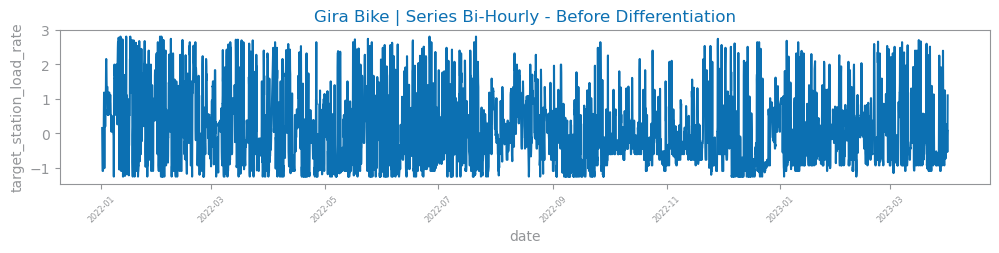

In [5]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_0 = data.copy()

df_0: DataFrame = data_0
#series - series of original df with no transformation
series: Series = df_0[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} | Series Bi-Hourly - Before Differentiation",
)
show()

In [18]:
display(df_0.head())
display(series.head())

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 12:00:00,0.209711,-0.185984,-0.266712,-1.183773,5.395986,0.056934,0.155489,-0.295052,0.545027,0.563042,-0.841692,-0.495891
2022-01-01 14:00:00,0.438713,-0.185984,-0.266712,-1.135627,5.395986,0.056934,-0.440362,-0.892822,0.131458,0.846781,-0.807433,-0.673815
2022-01-01 16:00:00,0.076126,-0.185984,-0.325721,-1.071433,5.395986,0.056934,-0.926771,-0.219808,-1.028156,-0.018624,-1.233225,-0.977332
2022-01-01 18:00:00,-0.458211,-0.185984,-0.266712,-0.846751,5.395986,0.056934,-1.088907,-0.654550,-0.338875,-1.032993,-1.443674,-0.846506
2022-01-01 20:00:00,-0.477295,-0.185984,-0.266712,-0.654167,5.395986,0.056934,-1.088907,-0.596027,0.078749,-0.589650,-0.699762,-0.846506


date
2022-01-01 12:00:00    0.155489
2022-01-01 14:00:00   -0.440362
2022-01-01 16:00:00   -0.926771
2022-01-01 18:00:00   -1.088907
2022-01-01 20:00:00   -1.088907
Name: target_station_load_rate, dtype: float64

### Evaluate

In [6]:
from pandas import Series, DataFrame

def series_train_test_split(data, trn_pct: float = 0.90):
    trn_size: int = int(len(data) * trn_pct)
    df_cp = data.copy()

    if isinstance(df_cp, Series):
        train: Series = df_cp.iloc[:trn_size]
        test: Series = df_cp.iloc[trn_size:]
    elif isinstance(df_cp, DataFrame):
        train: DataFrame = df_cp.iloc[:trn_size]
        test: DataFrame = df_cp.iloc[trn_size:]
    else:
        raise TypeError("Input must be a Series or DataFrame.")

    return train, test

def dataframe_temporal_train_test_split(data: DataFrame, trn_pct: float = 0.90) -> tuple[DataFrame, DataFrame]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: DataFrame = data.copy()
    train: DataFrame = df_cp.iloc[:trn_size]
    test: DataFrame = df_cp.iloc[trn_size:]
    return train, test

In [7]:
from math import sqrt
from matplotlib.pyplot import subplots
from pandas import Series

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list:
    # Calculate evaluation metrics
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values and sizes of train and test sets
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"Train size: {len(trn)}")
    print(f"Test size: {len(tst)}")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    # Plot the metrics
    HEIGHT = 6
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)

    return axs

In [8]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression Evaliation - No Differentiation) ###
Train size: 4878
Test size: 543
RMSE - Train: 0.9859, Test: 1.0247
MAE - Train: 0.8066, Test: 0.7382
MAPE - Train: 1.2797, Test: 1.7767
R2 - Train: 0.0322, Test: -0.0948



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

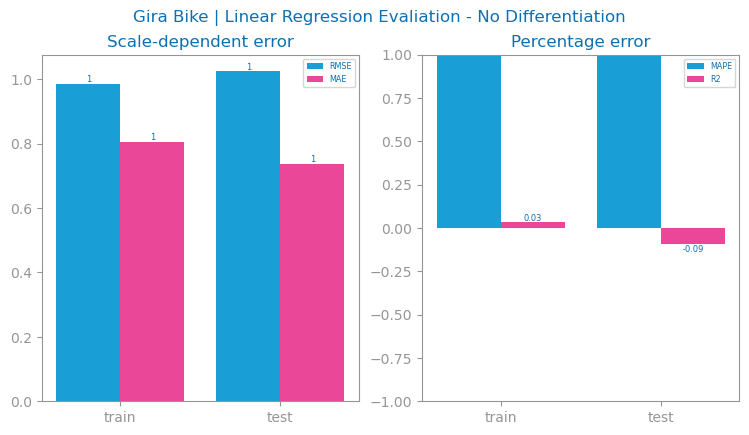

In [9]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


series = series.sort_index()

train_0, test_0 = series_train_test_split(series, trn_pct=test_split_threshold)

trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0.to_numpy()
tstX_0 = arange(len(train_0), len(series)).reshape(-1, 1)
tstY_0 = test_0.to_numpy()

model = LinearRegression()
model.fit(trnX_0, trnY_0)

prd_trn_0: Series = Series(model.predict(trnX_0), index=train_0.index)
prd_tst_0: Series = Series(model.predict(tstX_0), index=test_0.index)

plot_forecasting_eval(train_0, test_0, prd_trn_0, prd_tst_0, title=f"{file_tag} | Linear Regression Evaliation - No Differentiation")

### Plot

<Axes: xlabel='date', ylabel='target_station_load_rate'>

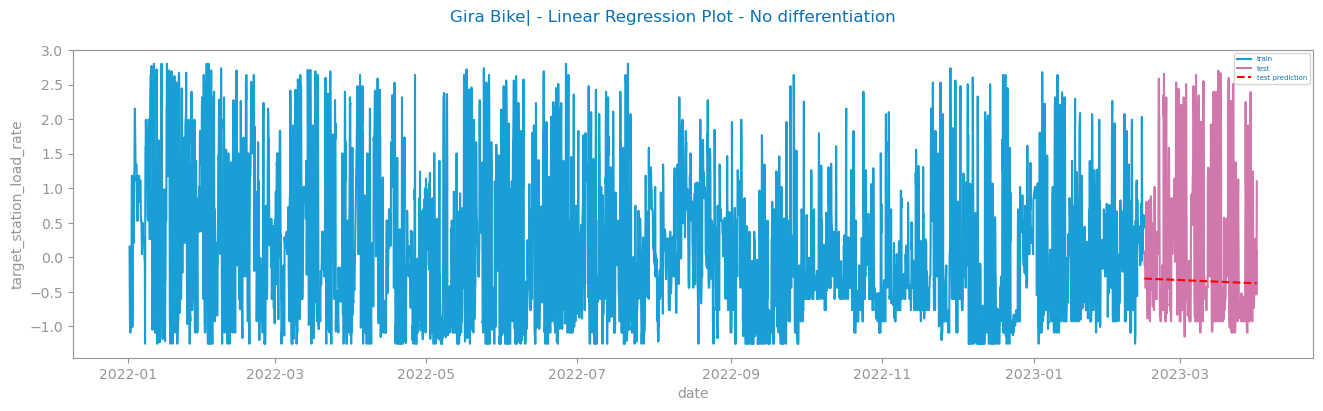

In [10]:
plot_forecasting_series(
    train_0,
    test_0,
    prd_tst_0,
    title=f"{file_tag}| - Linear Regression Plot - No differentiation",
    xlabel="date",
    ylabel=target,
)

## Differentiation 1 (num_diffs=1)
- In this strategy we will apply 1 differentiation to intial df and check results

### Strategy Application

In [11]:
# Function to differentiate multiple times
def differentiate_df(data, n):
    for _ in range(n):
        data = data.diff().dropna()  # Differentiation and dropping NaNs
    return data


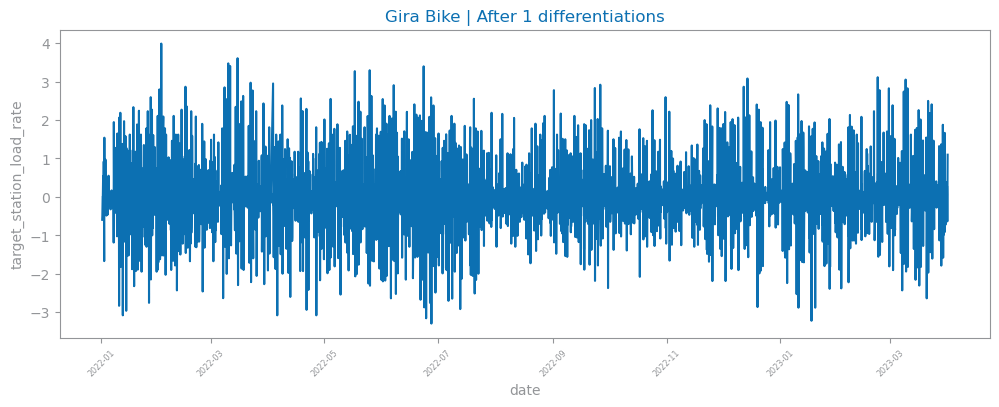

In [12]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_1 = data.copy()


# Apply multiple differentiations
n_diff = 1  # Number of times to differentiate (e.g., 3 times)
df_1: DataFrame = differentiate_df(data_1,n_diff)
#series - series of original df with no transformation
series_diff_1: Series = df_1[target]

# Plot the result after differentiation
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series_diff_1.index.to_list(),
    series_diff_1.to_list(),
    title=f"{file_tag} | After {n_diff} differentiations",
    xlabel=series_diff_1.index.name,
    ylabel=target,
)
show()

### Evaluate 

In [13]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression Evaluation - With 1 Differentiation) ###
Train size: 4878
Test size: 542
RMSE - Train: 0.7283, Test: 0.7414
MAE - Train: 0.4354, Test: 0.4389
MAPE - Train: 61527624497.4344, Test: 105766843869.9259
R2 - Train: 0.0000, Test: -0.0000



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

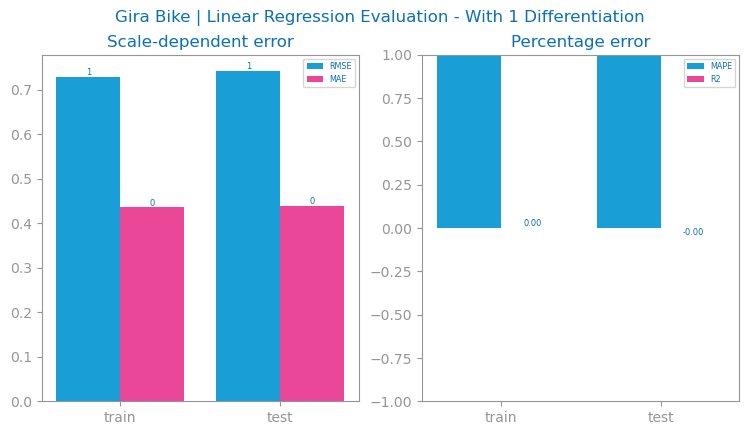

In [14]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange

series_diff_1 = series_diff_1.sort_index()
series_diff_1 = series_diff_1.dropna()

train_1, test_1 = series_train_test_split(series_diff_1, trn_pct=test_split_threshold)

trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1.to_numpy()
tstX_1 = arange(len(train_1), len(series_diff_1)).reshape(-1, 1)
tstY_1 = test_1.to_numpy()

model = LinearRegression()
model.fit(trnX_1, trnY_1)

prd_trn_1: Series = Series(model.predict(trnX_1), index=train_1.index)
prd_tst_1: Series = Series(model.predict(tstX_1), index=test_1.index)

plot_forecasting_eval(train_1, test_1, prd_trn_1, prd_tst_1, title=f"{file_tag} | Linear Regression Evaluation - With {n_diff} Differentiation")

### Linear Regression Plot

<Axes: xlabel='date', ylabel='target_station_load_rate'>

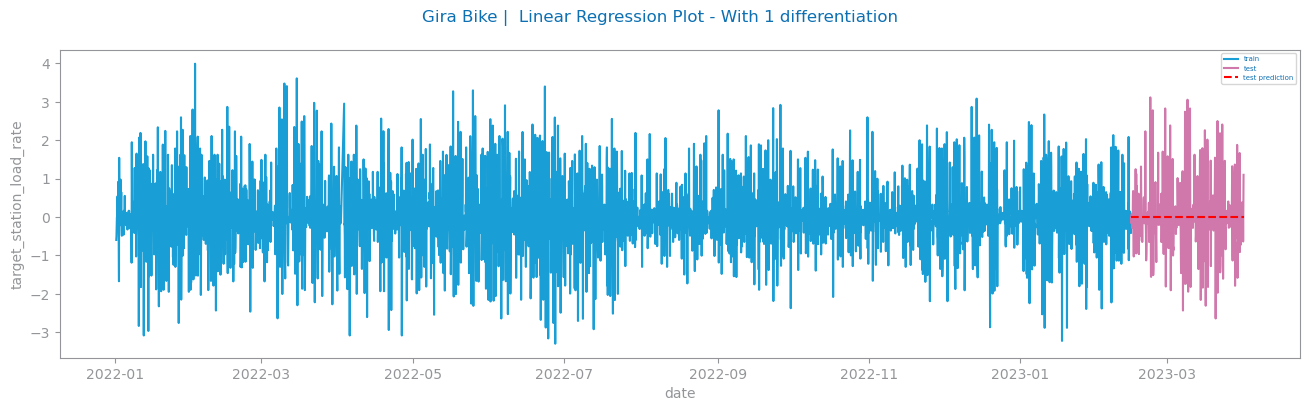

In [15]:
plot_forecasting_series(
    train_1,
    test_1,
    prd_tst_1,
    title=f"{file_tag} |  Linear Regression Plot - With {n_diff} differentiation",
    xlabel="date",
    ylabel=target,
)

## Differentiation 2 (num_diffs=2)
- In this strategy we will apply 2 differentiations to intial df and check results

### Strategy Application

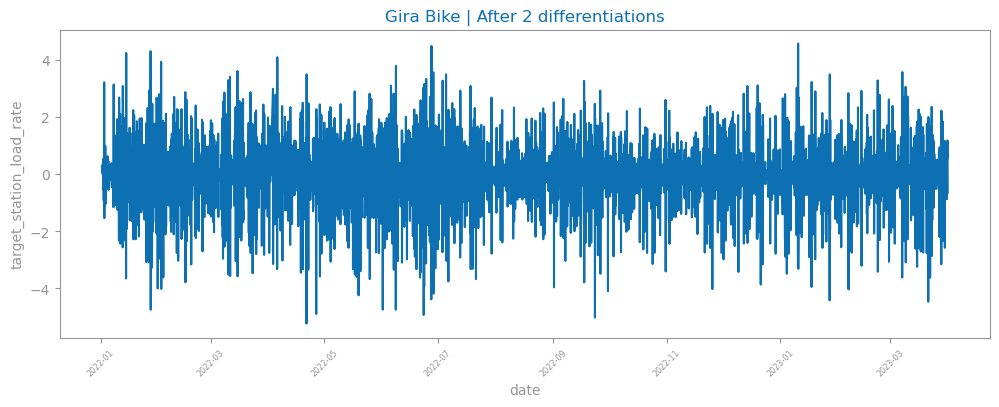

In [16]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_2 = data.copy()


# Apply multiple differentiations
n_diff = 2  # Number of times to differentiate (e.g., 3 times)
df_2: DataFrame = differentiate_df(data_2,n_diff)
#series - series of original df with no transformation
series_diff_2: Series = df_2[target]

# Plot the result after differentiation
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series_diff_2.index.to_list(),
    series_diff_2.to_list(),
    title=f"{file_tag} | After {n_diff} differentiations",
    xlabel=series_diff_2.index.name,
    ylabel=target,
)
show()

### Evaluate 

In [17]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression Evaluation - With 2 Differentiation) ###
Train size: 4877
Test size: 542
RMSE - Train: 1.0101, Test: 0.7414
MAE - Train: 0.6436, Test: 0.4389
MAPE - Train: 151594419612.2455, Test: 481834358683.3298
R2 - Train: 0.0000, Test: -0.0000



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

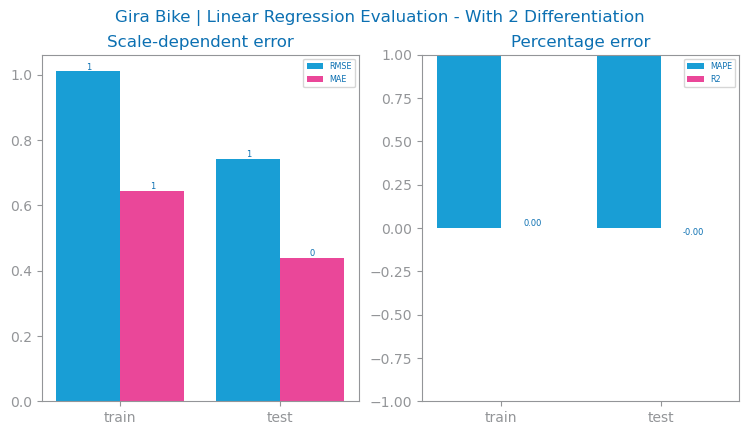

In [18]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange

series_diff_2 = series_diff_2.sort_index()
series_diff_2 = series_diff_2.dropna()

train_2, test_2 = series_train_test_split(series_diff_2, trn_pct=test_split_threshold)

trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2.to_numpy()
tstX_2 = arange(len(train_2), len(series_diff_2)).reshape(-1, 1)
tstY_2 = test_2.to_numpy()

model = LinearRegression()
model.fit(trnX_2, trnY_2)

prd_trn_2: Series = Series(model.predict(trnX_2), index=train_2.index)
prd_tst_2: Series = Series(model.predict(tstX_2), index=test_2.index)

plot_forecasting_eval(train_2, test_1, prd_trn_2, prd_tst_2, title=f"{file_tag} | Linear Regression Evaluation - With {n_diff} Differentiation")

### Linear Regression Plot

<Axes: xlabel='date', ylabel='target_station_load_rate'>

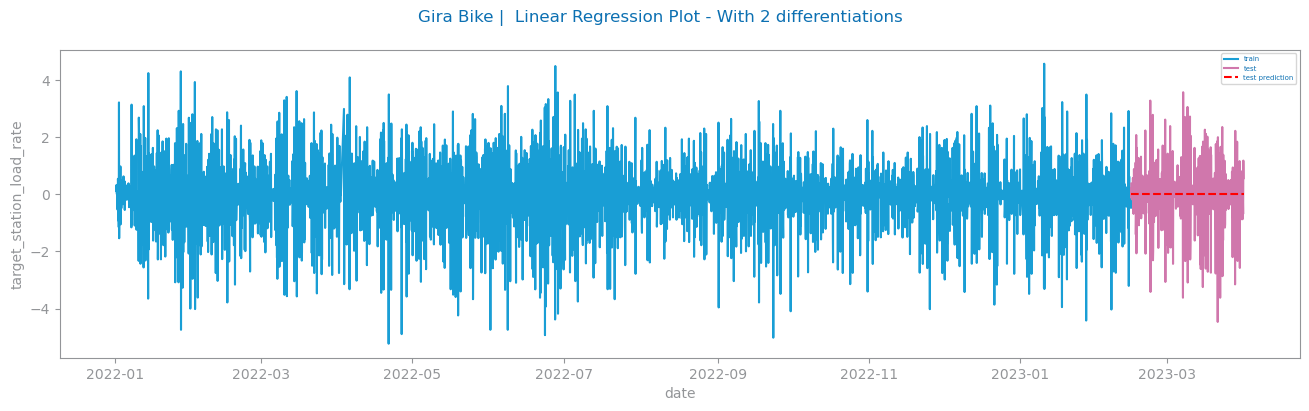

In [19]:
plot_forecasting_series(
    train_2,
    test_2,
    prd_tst_2,
    title=f"{file_tag} |  Linear Regression Plot - With {n_diff} differentiations",
    xlabel="date",
    ylabel=target,
)

## Approach uplift comparison

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Pequena constante para evitar divisão por zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calcular métricas para cada modelo
metrics = {
    "Model": ["No Differentiation", "1 Differentiation", "2 Differentiation"],
    "MAE": [
        mean_absolute_error(test_0, prd_tst_0),
        mean_absolute_error(test_1, prd_tst_1),
        mean_absolute_error(test_2, prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_0, prd_tst_0),
        mean_squared_error(test_1, prd_tst_1),
        mean_squared_error(test_2, prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_0, prd_tst_0, squared=False),
        mean_squared_error(test_1, prd_tst_1, squared=False),
        mean_squared_error(test_2, prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_0, prd_tst_0),
        r2_score(test_1, prd_tst_1),
        r2_score(test_2, prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0, prd_tst_0),
        mean_absolute_percentage_error(test_1, prd_tst_1),
        mean_absolute_percentage_error(test_2, prd_tst_2)
    ]
}

# Criar DataFrame para exibir as métricas
performance_df = pd.DataFrame(metrics)
display(performance_df)


,Model,MAE,MSE,RMSE,R²,MAPE
0,No Differentiation,0.738193,1.050101,1.024744,-0.094783,1.776717e+02
1,1 Differentiation,0.438915,0.549605,0.741353,-0.000005,2.348504e+07
2,2 Differentiation,0.603306,0.955823,0.977662,-0.000013,5.087793e+07


## Analysis of results after Transformation

- Analysis:
    - First Differentiation shows improvement in metrics like MAE, MSE, and RMSE, but the R² value is very close to zero, indicating minimal explanatory power. However, the MAPE is exceptionally high, which suggests that the model's predictions are not scaling properly after differencing.

    - Second Differentiation leads to worse results across most metrics, indicating that the additional differencing is over-complicating the model and might be removing too much useful information.

- How to proceed:
    - 1st Differentiation improved most of the metrics, but the MAPE is a concern.
    - We will proceed with df_1 (df with 1 differentiation) as it gives some improvement on R^2 without degrading performance like the second differencing. 

In [61]:
display(df_0.head())
display(series.head())

display(df_1.head())
display(series_diff_1.head())

display(df_2.head())
display(series_diff_2.head())

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 12:00:00,0.209711,-0.185984,-0.266712,-1.183773,5.395986,0.056934,0.155489,-0.295052,0.545027,0.563042,-0.841692,-0.495891
2022-01-01 14:00:00,0.438713,-0.185984,-0.266712,-1.135627,5.395986,0.056934,-0.440362,-0.892822,0.131458,0.846781,-0.807433,-0.673815
2022-01-01 16:00:00,0.076126,-0.185984,-0.325721,-1.071433,5.395986,0.056934,-0.926771,-0.219808,-1.028156,-0.018624,-1.233225,-0.977332
2022-01-01 18:00:00,-0.458211,-0.185984,-0.266712,-0.846751,5.395986,0.056934,-1.088907,-0.654550,-0.338875,-1.032993,-1.443674,-0.846506
2022-01-01 20:00:00,-0.477295,-0.185984,-0.266712,-0.654167,5.395986,0.056934,-1.088907,-0.596027,0.078749,-0.589650,-0.699762,-0.846506


date
2022-01-01 12:00:00    0.155489
2022-01-01 14:00:00   -0.440362
2022-01-01 16:00:00   -0.926771
2022-01-01 18:00:00   -1.088907
2022-01-01 20:00:00   -1.088907
Name: target_station_load_rate, dtype: float64

,date,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 14:00:00,0.229002,0.0,0.000000,0.048146,0.0,0.0,-0.595851,-0.597770,-0.413569,0.283739,0.034259,-0.177924
1,2022-01-01 16:00:00,-0.362586,0.0,-0.059009,0.064195,0.0,0.0,-0.486409,0.673013,-1.159614,-0.865405,-0.425792,-0.303518
2,2022-01-01 18:00:00,-0.534338,0.0,0.059009,0.224681,0.0,0.0,-0.162136,-0.434742,0.689281,-1.014369,-0.210449,0.130827
3,2022-01-01 20:00:00,-0.019083,0.0,0.000000,0.192584,0.0,0.0,0.000000,0.058523,0.417623,0.443343,0.743912,0.000000
4,2022-01-01 22:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.497445,-0.085147,0.088669,0.156613,0.172691


date
2022-01-01 14:00:00   -0.595851
2022-01-01 16:00:00   -0.486409
2022-01-01 18:00:00   -0.162136
2022-01-01 20:00:00    0.000000
2022-01-01 22:00:00    0.000000
Name: target_station_load_rate, dtype: float64

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 16:00:00,-0.591588,0.0,-0.059009,0.016049,0.000000,0.0,0.109442,1.270783,-0.746046,-1.149145,-0.460051,-0.125593
2022-01-01 18:00:00,-0.171751,0.0,0.118018,0.160487,0.000000,0.0,0.324273,-1.107755,1.848895,-0.148963,0.215343,0.434344
2022-01-01 20:00:00,0.515254,0.0,-0.059009,-0.032097,0.000000,0.0,0.162136,0.493264,-0.271658,1.457712,0.954361,-0.130827
2022-01-01 22:00:00,0.019083,0.0,0.000000,-0.192584,0.000000,0.0,0.000000,0.438922,-0.502770,-0.354674,-0.587299,0.172691
2022-01-02 00:00:00,-0.152668,0.0,0.000000,-0.192584,-5.581309,0.0,0.271578,-0.693914,0.004055,-0.088669,0.004894,-0.214556


date
2022-01-01 16:00:00    0.109442
2022-01-01 18:00:00    0.324273
2022-01-01 20:00:00    0.162136
2022-01-01 22:00:00    0.000000
2022-01-02 00:00:00    0.271578
Name: target_station_load_rate, dtype: float64

## Save to csv

In [21]:

# Select the DataFrame to save
data_save = df_1  
# Reset the index as data and save as csv
data_save.reset_index(inplace=True)
data_save.to_csv(f"data/df_gira_agg_2h_wtimevars_diff_input.csv", index=False)